In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

     |████████████████████████████████| 12.9MB 5.6MB/s eta 0:00:01    |███                             | 1.2MB 3.5MB/s eta 0:00:04     |███████████████▋                | 6.3MB 3.5MB/s eta 0:00:02     |████████████████████▊           | 8.3MB 3.5MB/s eta 0:00:02     |████████████████████████████▎   | 11.4MB 3.5MB/s eta 0:00:01�█████████████████████████▍ | 12.2MB 3.5MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

# A. Introduction

##### In this project we will try to find an optimal location for investing in a rental property in Melbourne. This report is targeted for investors looking to invest in residential rental property in Melbourne at a suitable location which can generate a high rental yield. 
##### Rental yield measures the profit you generated investment property as a percentage of its value. A good rental yield is dependent of two factors a) profit from the property i.e. earnings minus all expenditures and b) purchase price. In other words, rental yield will be high if earnings i.e. rentals are maximised with minimum investment. 
##### A property can be rented through rental agencies for long term rentals and also short-term letting services like Airbnb. Short term rentals have risen in popularity in recent years and with over 20,000 active listings across Metropolitan Melbourne has experienced one of Australia’s most robust growths in short-term rentals over the past two years. Hence, we will be looking at Airbnb listing data as an indicator of rental yield prospect.
##### Melbourne is a very big city with lot of property investment options. Property prices vary quite a bit in different parts of the city depending on various factors. Airbnb listings also varies greatly across the city along with rental tariffs or rates. Finally, number of venues like cafes, restaurants, pubs, shops and other places of interest, tourist locations also vary across the city. A high count of venues in a neighbourhood would imply popularity of that neighbourhood with renters.
##### Hence, to achieve a best rental yield, we need to look at areas with - (1)	relatively high Airbnb rents, (2) a high number of venues nearby, (3) with not so high property prices and (4) less competition from other properties / listings in that area i.e. lower count of listings will indicate less competition
##### We will use data science tools and methodology to identify a few most promising investment locations based on the above criteria. This would help a potential investors to make an informed decision about investing in a property at a suitable location in Melbourne


# B. Data 

##### Based on the business problem, we will be looking at below data – 

##### • Current residential property prices in Melbourne metropolitan region from Residential sales data
https://www.kaggle.com/htagholdings/aus-real-estate-sales-march-2019-to-april-2020

##### • Daily rent and number of listings from in a particular area from Airbnb data
http://insideairbnb.com/melbourne/?neighbourhood=&filterEntireHomes=false&filterHighlyAvailable=false&filterRecentReviews=false&filterMultiListings=false

##### • Venues and amenities (restaurants, cafes, pubs) in and around the area from Foursquare data. 

###  

# C. Methodology

##### We will extract Melbourne residential property prices from Australian real estate sales Sep’18-Jun’20 dataset as uploaded on Kaggle by HtAG Holdings.
##### 1. We will filter Melbourne data from this dataset. 
##### 2. We will also cleanse the data by removing any row where any of the cells are Null or NAN.  
##### 3. We will review the data for any outliers and remove those as well to get a correct perspective of the data.
##### 4. We will derive basic insights from the data like - a) total number of propereties, b) median house prices
##### 5. We will drop unwanted columns from the dataset to focus only on necessary columns

##### We will extract Airbnb listings data from ‘Inside Airbnb’ dataset. This data can be downloaded only for Melbourne which will include all neighbourhoods or Local Government Areas(LGAs) in the Melbourne Metropolitan Region.  
##### 1. We will also cleanse the data by removing any row where any of the cells are Null or NAN.  
##### 2. We will review the data for any outliers and remove those as well to get a correct perspective of the data.
##### 3. We will derive basic insights from the data like - a) total number of listings, b) average daily rate and c) number of neighbourhoods.
##### 4. We will drop unwanted columns from the dataset to focus only on necessary columns.

##### Note : The residential sales data is available for suburbs while the Airbnb listing data is available for neighbourhoods or LGAs. An LGA will have multiple suburbs. Hence, we will have to extract corresponding neighbourhoods for all suburbs in the residential sales data. Hence, we will have to extract corresponding neighbourhoods for all suburbs in the residential sales data. We can extract this mapping from Wikipedia. https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs
##### We have updated the property sales dataset to inlcude neighbourhoods.


##### Once we have extracted data from all 3 sources, we will combine them for a single dataset before we cluster the data to find optimum investment locations.

##### Import all libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.api.types import is_numeric_dtype
from scipy import stats
# Plotting Tools
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("darkgrid")
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
#Subplots
from plotly.subplots import make_subplots
#search for missing data
import missingno as msno
import os
import matplotlib.pyplot as plt
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster
from sklearn.cluster import KMeans
import os

##### Read the Australian property sales data and get a snapshot of the data

In [162]:
md= pd.read_csv('aus_property_sales.csv')

#fuction to show more rows and columns
def show_all(df):
    #This fuction lets us view the full dataframe
    with pd.option_context('display.max_rows', 400, 'display.max_columns', 100):
        display(df)

md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320334 entries, 0 to 320333
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date_sold      320334 non-null  object 
 1   price          257826 non-null  float64
 2   suburb         320334 non-null  object 
 3   city_name      320334 non-null  object 
 4   state          320334 non-null  object 
 5   lat            320256 non-null  float64
 6   lon            320256 non-null  float64
 7   bedrooms       320334 non-null  int64  
 8   property_type  320334 non-null  object 
 9   loc_pid        320334 non-null  object 
 10  lga_pid        320334 non-null  object 
 11  neighbourhood  119170 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 29.3+ MB


##### Drop any row with blank data

In [164]:
md = md.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

##### Filter data for Melbourne only

In [165]:
md = md.loc[md['city_name'] == 'Melbourne']
show_all(md)

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,neighbourhood
27012,4/09/2018 0:00,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit,VIC1150,VIC129,Yarra Ranges
27013,5/09/2018 0:00,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit,VIC1150,VIC129,Yarra Ranges
27014,2/11/2018 0:00,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit,VIC1150,VIC129,Yarra Ranges
27015,2/11/2018 0:00,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit,VIC1150,VIC129,Yarra Ranges
27016,3/11/2018 0:00,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit,VIC1150,VIC129,Yarra Ranges
...,...,...,...,...,...,...,...,...,...,...,...,...
312518,8/07/2019 0:00,785000.0,Eaglemont,Melbourne,VIC,-37.768046,145.052045,3,townhouse,VIC820,VIC165,Banyule
312519,28/10/2019 0:00,1307500.0,Eaglemont,Melbourne,VIC,-37.758452,145.056195,4,townhouse,VIC820,VIC165,Banyule
312520,22/11/2019 0:00,1110000.0,Eaglemont,Melbourne,VIC,-37.763377,145.053640,3,townhouse,VIC820,VIC165,Banyule
312521,28/11/2019 0:00,1185000.0,Eaglemont,Melbourne,VIC,-37.760763,145.066003,3,townhouse,VIC820,VIC165,Banyule


##### Lets get some insight on the sales data

In [166]:
print('Number of sales : ', md.shape[0])
print('Number of features in dataset: ', md.shape[1])
print('Average price at: ${}'.format(round(md.price.mean())))
print('Number of neighbourhoods : ',md.neighbourhood.nunique())

Number of sales :  98533
Number of features in dataset:  12
Average price at: $800489
Number of neighbourhoods :  31


##### Remove outliers

In [167]:
def rem_outliers(df):  
    for name in list(md.columns):
        if is_numeric_dtype(md[name]):
            y = md[name]
            removed_outliers = y.between(y.quantile(.001), y.quantile(.999))
            #removed_outliers.value_counts()
            index_names = md[~removed_outliers].index # invert removed outliers
            md.drop(index_names, inplace=True)

#show_all(md)

##### Sales data after removing outliers

In [168]:
rem_outliers(md)
print('Number of sales : ', md.shape[0])
print('Number of features in dataset: ', md.shape[1])
print('Average price at: ${}'.format(round(md.price.mean())))
print('Number of neighbourhoods : ',md.neighbourhood.nunique())

Number of sales :  97913
Number of features in dataset:  12
Average price at: $795219
Number of neighbourhoods :  31


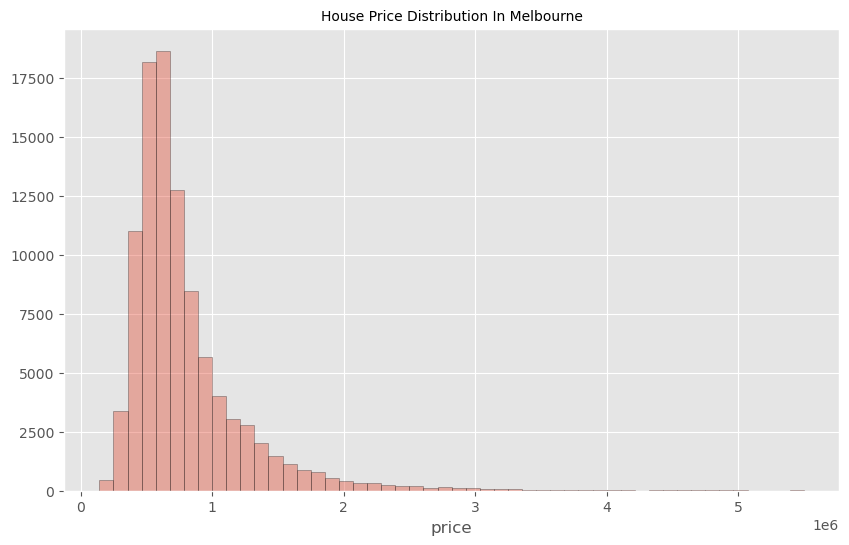

In [170]:
plt.style.use("ggplot")
plt.figure(figsize=(10,6))

sns.distplot(md['price'],kde=False,hist_kws=dict(edgecolor="k"))
plt.title("House Price Distribution In Melbourne",size=10);

##### Remove unwanted columns

In [171]:
md = md.drop(['loc_pid','lga_pid', 'date_sold', 'city_name' ], axis=1)
#show_all(md)

##### Lets derive mean of property sales prices in those neighbourhood. Also we will derive the median of all latitude and longitudes of respective neighbourhoods.

In [173]:
md['mean_property_price'] = md.groupby('neighbourhood').price.transform('mean')
md['median_lat'] = md.groupby('neighbourhood').lat.transform('median')
md['median_lon'] = md.groupby('neighbourhood').lon.transform('median')
md = md[['neighbourhood', 'mean_property_price', 'median_lat' , 'median_lon']]
md = md.drop_duplicates()
mdp = md
mdp

,neighbourhood,mean_property_price,median_lat,median_lon
27012,Yarra Ranges,7.191504e+05,-37.781017,145.359635
27035,Maroondah,7.248123e+05,-37.805386,145.273674
27278,Yarra,9.321936e+05,-37.811031,144.996727
28377,Wyndham,5.601099e+05,-37.878309,144.674351
28702,Whittlesea,5.971270e+05,-37.642499,145.050297
29011,Nillumbik,7.577335e+05,-37.612084,145.132760
29108,Whitehorse,1.002269e+06,-37.822905,145.154471
29930,Monash,1.071530e+06,-37.891173,145.129907
30062,Stonnington,1.142072e+06,-37.851744,145.012184
32120,Port Philip,9.965714e+05,-37.859060,144.977504


##### This graphical representation demonstrates distribution of neighbourhoods in the Melbourne Metropolitan Region

In [226]:
lat = md['median_lat']
lon = md['median_lon']
locations = list(zip(lat, lon))

map_mel = folium.Map(location=[-37.815018, 144.946014],tiles='CartoDB Positron',zoom_start=10 ) #'CartoDB dark_matter'  #melb location:-37.8136° N, 144.9631° E
FastMarkerCluster(data=locations).add_to(map_mel)
map_mel

##### Read airbnb listings data and get a snapshot on the data

In [176]:
ld = pd.read_csv('listings.csv')
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23447 entries, 0 to 23446
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23447 non-null  int64  
 1   name                            23446 non-null  object 
 2   host_id                         23447 non-null  int64  
 3   host_name                       23444 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23447 non-null  object 
 6   latitude                        23447 non-null  float64
 7   longitude                       23447 non-null  float64
 8   room_type                       23447 non-null  object 
 9   price                           23447 non-null  int64  
 10  minimum_nights                  23447 non-null  int64  
 11  number_of_reviews               23447 non-null  int64  
 12  last_review                     

##### Get some insights on the data

In [177]:
print('Number of listings: ', ld.shape[0])
print('Number of features in dataset: ', ld.shape[1])
print('Average price at: ${}'.format(round(ld.price.mean())))
print('Number of neighbourhoods: ',ld.neighbourhood.nunique())

Number of listings:  23447
Number of features in dataset:  16
Average price at: $164
Number of neighbourhoods:  30


In [178]:
show_all(ld)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.772680,145.092130,Private room,59,1,4,12/09/2015,0.04,1,365
1,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.766510,144.980740,Private room,35,4,145,8/04/2020,1.61,1,41
2,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.859990,144.976620,Entire home/apt,159,3,42,15/03/2020,0.35,10,0
3,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.057250,145.339360,Entire home/apt,99,1,149,16/05/2020,1.28,1,351
4,41836,CLOSE TO CITY & MELBOURNE AIRPORT,182833,Diana,NaN,Darebin,-37.697290,145.000820,Private room,51,7,161,19/09/2019,1.38,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23442,43733191,"Top floor, luminous two-bedroom home with a view.",200389920,Guillaume,NaN,Stonnington,-37.845250,145.000150,Entire home/apt,350,3,0,NaN,NaN,1,79
23443,43744200,1 Bedroom Unit in beautiful Fairfield,94293783,Lisa,NaN,Darebin,-37.771890,145.018530,Entire home/apt,54,2,0,NaN,NaN,1,4
23444,43746933,2BR Cosy Home @CBD Melbourne Central + Free Tram,262207149,Bruce,NaN,Melbourne,-37.807862,144.963682,Entire home/apt,158,1,0,NaN,NaN,6,173
23445,43748923,❤️InnerCBD/1Min ->Station/FREE(Parking/Tram)/H...,158100659,SkyBlue Lodge,NaN,Melbourne,-37.815013,144.952045,Entire home/apt,90,1,0,NaN,NaN,25,159


##### Remove outliers in the data

In [179]:
rem_outliers(ld)
print('Number of listings: ', ld.shape[0])
print('Number of features in dataset: ', ld.shape[1])
print('Average price at: ${}'.format(round(ld.price.mean())))
print('Number of neighbourhoods: ',ld.neighbourhood.nunique())

Number of listings:  23447
Number of features in dataset:  16
Average price at: $164
Number of neighbourhoods:  30


##### A visual map of property listings across Melbourne

In [227]:
lat = ld['latitude']
lon = ld['longitude']
locations = list(zip(lat, lon))

map_mel1 = folium.Map(location=[-37.815018, 144.946014],tiles='CartoDB Positron',zoom_start=10 ) #'CartoDB dark_matter'  #melb location:-37.8136° N, 144.9631° E
FastMarkerCluster(data=locations).add_to(map_mel1)
map_mel1

##### The graph shows us we have airbnd listings throughout the Melbourne Metropolitan Region. However we have a high number of listings in the CBD and surrounds.

##### Remove unwanted columns

In [181]:
ld = ld.drop(['name', 'host_id', 'host_name' , 'neighbourhood_group', 'room_type' , 'last_review' , 
                             'minimum_nights' , 'number_of_reviews' , 'calculated_host_listings_count' , 'availability_365' , 
                             'reviews_per_month'], axis=1)
ld

,id,neighbourhood,latitude,longitude,price
0,9835,Manningham,-37.772680,145.092130,59
1,10803,Moreland,-37.766510,144.980740,35
2,12936,Port Phillip,-37.859990,144.976620,159
3,38271,Casey,-38.057250,145.339360,99
4,41836,Darebin,-37.697290,145.000820,51
...,...,...,...,...,...
23442,43733191,Stonnington,-37.845250,145.000150,350
23443,43744200,Darebin,-37.771890,145.018530,54
23444,43746933,Melbourne,-37.807862,144.963682,158
23445,43748923,Melbourne,-37.815013,144.952045,90


##### Lets get the median of daily rates / tariff for properties. Also lets find out total number of listings per neighbourhood.

In [182]:
ld['total_listings'] = ld.groupby('neighbourhood').id.transform('count')
ld['median_price'] = ld.groupby('neighbourhood').price.transform('median')
ld.drop_duplicates()
ld

,id,neighbourhood,latitude,longitude,price,total_listings,median_price
0,9835,Manningham,-37.772680,145.092130,59,314,107.5
1,10803,Moreland,-37.766510,144.980740,35,991,81.0
2,12936,Port Phillip,-37.859990,144.976620,159,2880,120.0
3,38271,Casey,-38.057250,145.339360,99,191,65.0
4,41836,Darebin,-37.697290,145.000820,51,670,80.0
...,...,...,...,...,...,...,...
23442,43733191,Stonnington,-37.845250,145.000150,350,1570,111.0
23443,43744200,Darebin,-37.771890,145.018530,54,670,80.0
23444,43746933,Melbourne,-37.807862,144.963682,158,7287,124.0
23445,43748923,Melbourne,-37.815013,144.952045,90,7287,124.0


In [119]:
n_latitude = ld.loc[0, 'latitude'] # neighborhood latitude value
n_longitude = ld.loc[0, 'longitude'] # neighborhood longitude value

n_name = ld.loc[0, 'neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(n_name, 
                                                               n_latitude, 
                                                               n_longitude))

Latitude and longitude values of Manningham are -37.77268, 145.09213.


##### Let's get venues data from the Four Square API 

In [183]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AQJHMOUGV0I4GTT4MCVTEETMU3AHJZBWWD3M5VVI1KXZAIY3
CLIENT_SECRET:QQI1EPSBK1I1R5FPDAUC2J125OVDA45ZDXGPHGQ4NY0YCI4C


##### Let's create the GET request URL. Lets keep a limit of 100 venues and a radius 2KM for each neighbourhood

##### Exploring neighbourhoods in the Melbourne Metropolitan Region

##### A function to get all venues across all neighbourhoods in the Melbourne Metropolitan Region

In [190]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

##### Use above function to create new dataframe with neighbourhoods and nerby venues

In [191]:
melb_data = mdp
MMR_venues = getNearbyVenues(names=melb_data['neighbourhood'],
                                   latitudes=melb_data['median_lat'],
                                   longitudes=melb_data['median_lon']
                                  )

Yarra Ranges
Maroondah
Yarra
Whittlesea
Nillumbik
Whitehorse
Monash
Stonnington
Port Philip
Melbourne
Banyule
Moreland
Moonee Valley
Maribyrnong
Manningham
Knox
Kingston
Hobsons Bay
Greater Dandenong
Glen Eira
Frankston
Darebin
Casey
Brimbank
Boroondara


##### Lets have a look at the data

In [192]:
print(MMR_venues.shape)
MMR_venues.head()

(1373, 7)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Yarra Ranges,-37.781017,145.359635,Lillydale Lake,-37.764990,145.356941,Lake
1,Yarra Ranges,-37.781017,145.359635,Billy Goat Hill,-37.786144,145.379143,Breakfast Spot
2,Yarra Ranges,-37.781017,145.359635,Mt Evelyn SUPA IGA,-37.786904,145.379177,Grocery Store
3,Yarra Ranges,-37.781017,145.359635,York on Lilydale,-37.795828,145.360735,Pub
4,Yarra Ranges,-37.781017,145.359635,Heart & Soul Coffee Lounge,-37.786293,145.379365,Café


##### Lets find out total number of venues in each neighbourhoods

In [193]:
summary = MMR_venues.groupby('Neighbourhood').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head(30)

,Neighbourhood,Count
0,Nillumbik,4
1,Yarra Ranges,5
2,Casey,11
3,Whittlesea,15
4,Hobsons Bay,15
5,Banyule,19
6,Brimbank,20
7,Greater Dandenong,23
8,Maroondah,25
9,Kingston,37


##### Lets recap the airbnb listing data grouped according to neighbourhoods

In [194]:
#lis = lis.drop(['id'] , axis=1)
#ld = ld.drop(['price'] , axis=1)
#md = md[['neighbourhood', 'mean_price', 'median_lat' , 'median_lon']]
lis = ld[['neighbourhood', 'total_listings', 'median_price']]
lis = lis.drop_duplicates().reset_index(drop=True)
lis

,neighbourhood,total_listings,median_price
0,Manningham,314,107.5
1,Moreland,991,81.0
2,Port Phillip,2880,120.0
3,Casey,191,65.0
4,Darebin,670,80.0
5,Monash,677,69.0
6,Frankston,195,114.0
7,Yarra,1921,119.0
8,Melbourne,7287,124.0
9,Boroondara,683,94.0


##### Lets merge the airbnb listing data with venues data

In [197]:
liswven = pd.merge(lis ,summary, left_on='neighbourhood', right_on='Neighbourhood')
liswven.set_index('neighbourhood',inplace=True)
liswven.head()

,total_listings,median_price,Neighbourhood,Count
neighbourhood,,,,
Manningham,314,107.5,Manningham,57
Moreland,991,81.0,Moreland,72
Casey,191,65.0,Casey,11
Darebin,670,80.0,Darebin,100
Monash,677,69.0,Monash,44


##### Lets recap the property sales data

In [198]:
mdp.set_index('neighbourhood' , inplace=True)
mdp.head()

,mean_property_price,median_lat,median_lon
neighbourhood,,,
Yarra Ranges,719150.407548,-37.781017,145.359635
Maroondah,724812.340258,-37.805386,145.273674
Yarra,932193.580357,-37.811031,144.996727
Whittlesea,597127.047728,-37.642499,145.050297
Nillumbik,757733.474369,-37.612084,145.132760


##### Lets now merge the property, listings and the venue count data

In [199]:
final_lis = pd.merge(liswven ,mdp, left_on='neighbourhood', right_on='neighbourhood')
#final_lis = final_lis[['neighbourhood', 'total_listings', 'median_price', 'Count', 'mean_property_price']]
final_lis.head()

,total_listings,median_price,Neighbourhood,Count,mean_property_price,median_lat,median_lon
neighbourhood,,,,,,,
Manningham,314,107.5,Manningham,57,1.096242e+06,-37.780501,145.147922
Moreland,991,81.0,Moreland,72,7.706124e+05,-37.737234,144.951189
Casey,191,65.0,Casey,11,6.031648e+05,-38.065404,145.296309
Darebin,670,80.0,Darebin,100,8.528024e+05,-37.739139,145.009280
Monash,677,69.0,Monash,44,1.071530e+06,-37.891173,145.129907


##### We will be looking at rental yield as one of the primary criteria for investment in a residential property. We are going to consider the gross yield for our analysis as we are unable to calculate net yield due to unavailability of data

##### As observed with short term rentals, a property is not rented for whole of the year or 100% of the time it is listed for rent. On average a short term rental property gets rented for 270 days in a year which is roughly 74% of the listing time

In [200]:
final_lis['yield'] = (final_lis.median_price*270*100).div(final_lis.mean_property_price)
#final_lis

##### Let us now find out the statistics of listings, venues count and yield

##### Statistics on listings

In [202]:
final_lis['total_listings'].describe()

count      24.000000
mean      800.875000
std      1454.974834
min        96.000000
25%       187.500000
50%       349.000000
75%       678.500000
max      7287.000000
Name: total_listings, dtype: float64

##### Statistics on venue counts

In [203]:
final_lis['Count'].describe()

count     24.000000
mean      53.041667
std       36.295262
min        4.000000
25%       19.750000
50%       44.000000
75%       97.000000
max      100.000000
Name: Count, dtype: float64

##### Statistics on yield

In [201]:
final_lis['yield'].describe()

count    24.000000
mean      3.118801
std       1.277804
min       1.659803
25%       2.429594
50%       2.670054
75%       3.321478
max       7.508860
Name: yield, dtype: float64

##### Statistics on daily rate

In [204]:
final_lis['median_price'].describe()

count     24.000000
mean      93.770833
std       31.214538
min       51.000000
25%       78.500000
50%       86.500000
75%      110.250000
max      200.000000
Name: median_price, dtype: float64

##### Statistics on property prices

In [205]:
final_lis['mean_property_price'].describe()

count    2.400000e+01
mean     8.489392e+05
std      2.195715e+05
min      5.971270e+05
25%      7.091455e+05
50%      8.111499e+05
75%      9.505712e+05
max      1.529097e+06
Name: mean_property_price, dtype: float64

##### Lets group listings , venue counts and yield in low, medium and high categories designated as 1, 2 and 3 respectively. 

In [206]:
data_process = final_lis

level = []
level2 = []
level4 = []

for i in range(0,len(data_process)):
    if (data_process['total_listings'][i] < 177):
        level.append(3)
    elif (data_process['total_listings'][i] >= 177 and data_process['total_listings'][i] < 670):
        level.append(2)
    elif (data_process['total_listings'][i] >= 670):  
        level.append(1)                    
        
    if (data_process['Count'][i] < 18):
        level2.append(1)
    elif (data_process['Count'][i] >= 18 and data_process['Count'][i] < 86):
        level2.append(2)
    elif (data_process['Count'][i] >= 86):  
        level2.append(3)      
        
    if (data_process['yield'][i] < 2.42):
        level4.append(1)
    elif (data_process['yield'][i] >= 2.42 and data_process['yield'][i] < 3.32):
        level4.append(2)
    elif (data_process['yield'][i] >= 3.32):  
        level4.append(3)  
            
data_process['Listings'] = level
data_process['Venues'] = level2
data_process['yields'] = level4

data_process.head()


,total_listings,median_price,Neighbourhood,Count,mean_property_price,median_lat,median_lon,yield,Listings,Venues,yields
neighbourhood,,,,,,,,,,,
Manningham,314,107.5,Manningham,57,1.096242e+06,-37.780501,145.147922,2.647682,2,2,2
Moreland,991,81.0,Moreland,72,7.706124e+05,-37.737234,144.951189,2.838003,1,2,2
Casey,191,65.0,Casey,11,6.031648e+05,-38.065404,145.296309,2.909653,2,1,2
Darebin,670,80.0,Darebin,100,8.528024e+05,-37.739139,145.009280,2.532826,1,3,2
Monash,677,69.0,Monash,44,1.071530e+06,-37.891173,145.129907,1.738636,1,2,1


##### Lets select parameters for clustering

In [207]:
data_process2 =  data_process[['Neighbourhood', 'Listings', 'yields' , 'Venues', ]]

In [208]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 

##### Lets consider 6 clusters for KMeans algorithm

In [209]:
kclusters = 6

mel_grouped_clustering = data_process2.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mel_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([0, 0, 3, 1, 2, 0, 1, 1, 5, 0, 3, 1, 5, 2, 3, 0, 4, 0, 2, 2, 4, 4,
       4, 3], dtype=int32)

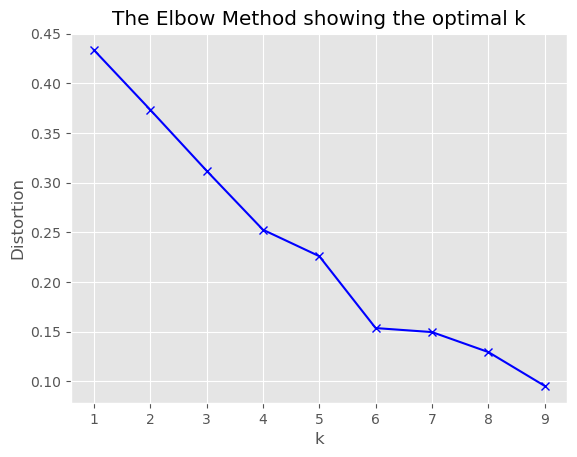

In [210]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(mel_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(mel_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / mel_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Neighbourhood and clusters

In [211]:
mel_merged_final = data_process2

# add clustering labels
mel_merged_final['Cluster Labels'] = kmeans.labels_

mel_merged_final # check the last columns!

,Neighbourhood,Listings,yields,Venues,Cluster Labels
neighbourhood,,,,,
Manningham,Manningham,2,2,2,0
Moreland,Moreland,1,2,2,0
Casey,Casey,2,2,1,3
Darebin,Darebin,1,2,3,1
Monash,Monash,1,1,2,2
Frankston,Frankston,2,3,2,0
Yarra,Yarra,1,3,3,1
Melbourne,Melbourne,1,3,3,1
Boroondara,Boroondara,1,1,3,5


In [212]:
mel_merged_final_cluster = mel_merged_final[['Cluster Labels']]

# D. Results

### D.1. Consolidated data

##### Lets now merge sales, listings, venues and cluster data

In [216]:
resultpd = pd.merge(data_process, mel_merged_final_cluster, left_on='neighbourhood', right_on='neighbourhood')
result = resultpd[['Neighbourhood', 'total_listings', 'median_price', 'mean_property_price' , 'yield', 'Count', 'median_lat' , 'median_lon', 'Cluster Labels']].sort_values('Cluster Labels', axis = 0, ascending = True)
result

,Neighbourhood,total_listings,median_price,mean_property_price,yield,Count,median_lat,median_lon,Cluster Labels
neighbourhood,,,,,,,,,
Manningham,Manningham,314,107.5,1.096242e+06,2.647682,57,-37.780501,145.147922,0
Moreland,Moreland,991,81.0,7.706124e+05,2.838003,72,-37.737234,144.951189,0
Maribyrnong,Maribyrnong,544,74.0,7.428494e+05,2.689643,100,-37.796481,144.882509,0
Banyule,Banyule,248,80.0,8.805363e+05,2.453050,19,-37.721819,145.096325,0
Kingston,Kingston,329,100.0,8.516874e+05,3.170177,37,-37.986676,145.096782,0
Frankston,Frankston,195,114.0,6.091265e+05,5.053137,39,-38.138549,145.155559,0
Melbourne,Melbourne,7287,124.0,6.791307e+05,4.929832,100,-37.812090,144.958132,1
Stonnington,Stonnington,1570,111.0,1.142072e+06,2.624177,100,-37.851744,145.012184,1
Darebin,Darebin,670,80.0,8.528024e+05,2.532826,100,-37.739139,145.009280,1


##### Now lets take a closer look in the data for neighbourhoods in cluster 0

In [219]:
result_c0 = result[result['Cluster Labels'] == 0 ]
result_c0 = result_c0[['total_listings', 'median_price', 'mean_property_price', 'yield', 'Count']]
result_c0

,total_listings,median_price,mean_property_price,yield,Count
neighbourhood,,,,,
Manningham,314,107.5,1.096242e+06,2.647682,57
Moreland,991,81.0,7.706124e+05,2.838003,72
Maribyrnong,544,74.0,7.428494e+05,2.689643,100
Banyule,248,80.0,8.805363e+05,2.453050,19
Kingston,329,100.0,8.516874e+05,3.170177,37
Frankston,195,114.0,6.091265e+05,5.053137,39


##### Now lets look at the data for neighbourhoods in cluster 1

In [220]:
result_c1 = result[result['Cluster Labels'] == 1 ]
result_c1 = result_c1[['total_listings', 'median_price', 'mean_property_price', 'yield', 'Count']]
result_c1

,total_listings,median_price,mean_property_price,yield,Count
neighbourhood,,,,,
Melbourne,7287,124.0,6.791307e+05,4.929832,100
Stonnington,1570,111.0,1.142072e+06,2.624177,100
Darebin,670,80.0,8.528024e+05,2.532826,100
Yarra,1921,119.0,9.321936e+05,3.446709,100


##### Now lets look at the data for neighbourhoods in cluster 2

In [221]:
result_c2 = result[result['Cluster Labels'] == 2 ]
result_c2 = result_c2[['total_listings', 'median_price', 'mean_property_price', 'yield', 'Count']]
result_c2

,total_listings,median_price,mean_property_price,yield,Count
neighbourhood,,,,,
Monash,677,69.0,1.071530e+06,1.738636,44
Whitehorse,659,85.0,1.002269e+06,2.289805,65
Moonee Valley,369,80.0,9.333387e+05,2.314272,84
Whittlesea,177,51.0,5.971270e+05,2.306042,15


##### Now lets look at the data for neighbourhoods in cluster 3

In [225]:
result_c3 = result[result['Cluster Labels'] == 3 ]
result_c3 = result_c3[['total_listings', 'median_price', 'mean_property_price', 'yield', 'Count']]
result_c3

,total_listings,median_price,mean_property_price,yield,Count
neighbourhood,,,,,
Hobsons Bay,250,110.0,889251.138875,3.339889,15
Yarra Ranges,828,200.0,719150.407548,7.508860,5
Casey,191,65.0,603164.779619,2.909653,11
Nillumbik,96,130.0,757733.474369,4.632236,4


##### Now lets look at the data for neighbourhoods in cluster 4

In [223]:
result_c4 = result[result['Cluster Labels'] == 4 ]
result_c4 = result_c4[['total_listings', 'median_price', 'mean_property_price', 'yield', 'Count']]
result_c4

,total_listings,median_price,mean_property_price,yield,Count
neighbourhood,,,,,
Maroondah,104,89.0,724812.340258,3.315341,25
Brimbank,161,59.0,628763.380809,2.533544,20
Greater Dandenong,173,60.0,611213.646827,2.650464,23
Knox,168,80.0,742726.530222,2.908204,44


##### Now lets look at the data for neighbourhoods in cluster 5

In [224]:
result_c5 = result[result['Cluster Labels'] == 5 ]
result_c5 = result_c5[['total_listings', 'median_price', 'mean_property_price', 'yield', 'Count']]
result_c5

,total_listings,median_price,mean_property_price,yield,Count
neighbourhood,,,,,
Boroondara,683,94.0,1.529097e+06,1.659803,97
Glen Eira,616,88.0,1.007110e+06,2.359226,97


### D.2. Map of Cluster Results

In [214]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.7.0 --yes 
import folium # map rendering library

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.7.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.1.0               |     pyh9f0ad1d_0          41 KB  conda-forge
    branca-0.4.1            

In [215]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors

address = 'Melbourne, Australia'

# geopy.geocoders.options.default_user_agent = "abc"
geolocator = Nominatim(user_agent="Capstone")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude, longitude))

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, in zip(result['median_lat'], result['median_lon'], result['Neighbourhood'], result['Cluster Labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color= rainbow[cluster-1],
        popup=label,
        fill_color = rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


# E. Discussion

### E.1. Observations

##### Here is a rundown of the clusters - 
##### Cluster 0 : Most of the neighbourhoods in this cluster have medium levels of yield, competition, and mostly medium number of venues. Most of the neighbourhoods have medium propery prices.
##### Cluster 1 : All neighbourhoods have high count of venues. Most of the neighbourhoods have high competion. Though half of the neighbourhoods have high yields,  (Melbourne and Yarra), property prices are close to high property prices for most of the neighbourhoods.
##### Cluster 2 : Most of the neighbourhoods have high property prices and low yields. 
##### Cluster 3 : All neighbourhoods ave high yield, medium property prices and medium competion. However all these neighbourhoods have low count of nerby venues.
##### Cluster 4 : Characteristics of this cluster is similar to Cluster 0 with all parameters except yield lower than cluster 0.
##### Cluster 5 : This cluster has high property prices and low yields. However there are high number of venues in the vicinity and medium competition.

### E.2. Recommendations

##### As we have stated before, a solid investment property need to have high yield with minumum competion and should be in a neighbourhood popular with renters. With this objective, Clusters 2 and 5 are not suitable. Though cluster 1 is a very popular area, competion is the highest with relatively high property prices which would make neighbourhoods in this cluster not so ideal for investment. As mentioned above, cluster 0 and 4 are mostly similar and considering preoperty prices, cluster 4 is preferable over cluster 1. Except for the number of venues, Cluster 3 seems to have the best conditions for investment with highest yields with medium investment and medium competion.   
##### Hence neighbourhoods in Cluster 3 and Cluster 4 are ideal investment opportunities. A choice between these two will depend on investors preference. Investors looking for best yields should look at neighbourhoods in Cluster 3 while investors looking for a balance of everything should look at Cluster 4.

# Conclusion  

##### This analysis will enable potential investors in the residential investment property to shortlist some neighbourhoods based on few key criteria. This is help investors not familiar with the Melbourne property market or the Melbourne Metropolitan Region in general. However a property investor might have other considerations to make before investing in an property like budget, type of property etc. Hence it would be imperative to know an investors requirements to determine and recommend most appropriate neighbourhoods for an investment property in the Melbourne Metropolitan Region. 